# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "city"
city_url = url + "appid=" + weather_api_key + "&q=" + city
weather_response = requests.get(city_url)
city_weather = weather_response.json()
print(json.dumps(city_weather, indent=4, sort_keys=True))
#Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -35.2813,
        "lon": 149.1292
    },
    "dt": 1714466352,
    "id": 2172517,
    "main": {
        "feels_like": 284.22,
        "humidity": 76,
        "pressure": 1028,
        "temp": 285,
        "temp_max": 286.63,
        "temp_min": 283.19
    },
    "name": "City",
    "sys": {
        "country": "AU",
        "id": 2004200,
        "sunrise": 1714423162,
        "sunset": 1714461711,
        "type": 2
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 2.57
    }
}


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | loja
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | nizhnesortymskiy
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | miramar beach
Processing Record 9 of Set 1 | itaituba
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | ormara
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | labrador city
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | pinillos
Processing Record 17 of Set 1 | ola
Processing Record 18 of Set 1 | san fernando
Processing Record 19 of Set 1 | mata-utu
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | hithadhoo
Process

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coquimbo,-29.9533,-71.3436,287.00,54,100,2.06,CL,1714465854
1,loja,-3.9931,-79.2042,287.48,97,100,1.74,EC,1714466370
2,longyearbyen,78.2186,15.6401,275.06,69,75,4.63,SJ,1714466370
3,edinburgh of the seven seas,-37.0676,-12.3116,285.87,64,100,9.31,SH,1714466370
4,nizhnesortymskiy,62.4397,71.7603,271.15,75,97,7.54,RU,1714466371


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coquimbo,-29.9533,-71.3436,287.00,54,100,2.06,CL,1714465854
1,loja,-3.9931,-79.2042,287.48,97,100,1.74,EC,1714466370
2,longyearbyen,78.2186,15.6401,275.06,69,75,4.63,SJ,1714466370
3,edinburgh of the seven seas,-37.0676,-12.3116,285.87,64,100,9.31,SH,1714466370
4,nizhnesortymskiy,62.4397,71.7603,271.15,75,97,7.54,RU,1714466371


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

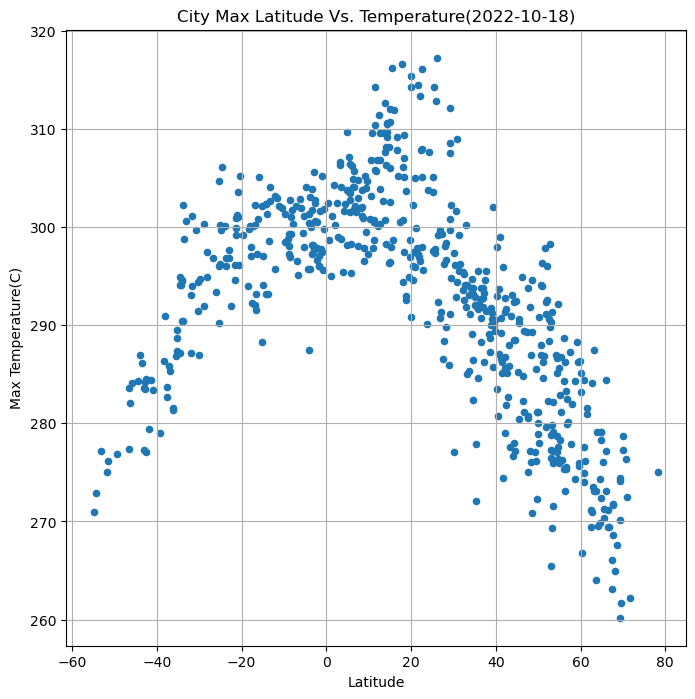

In [13]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="City Max Latitude Vs. Temperature(2022-10-18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
dot_size = 100
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

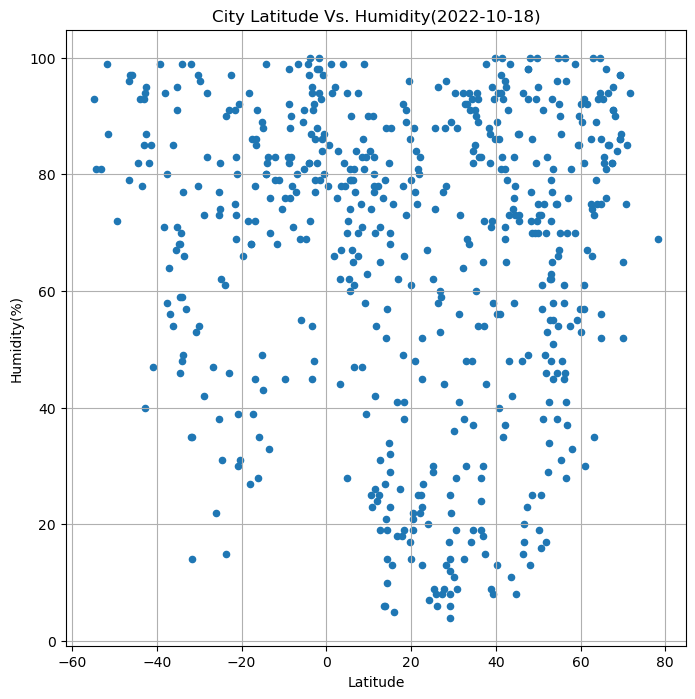

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="City Latitude Vs. Humidity(2022-10-18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
dot_size = 100
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

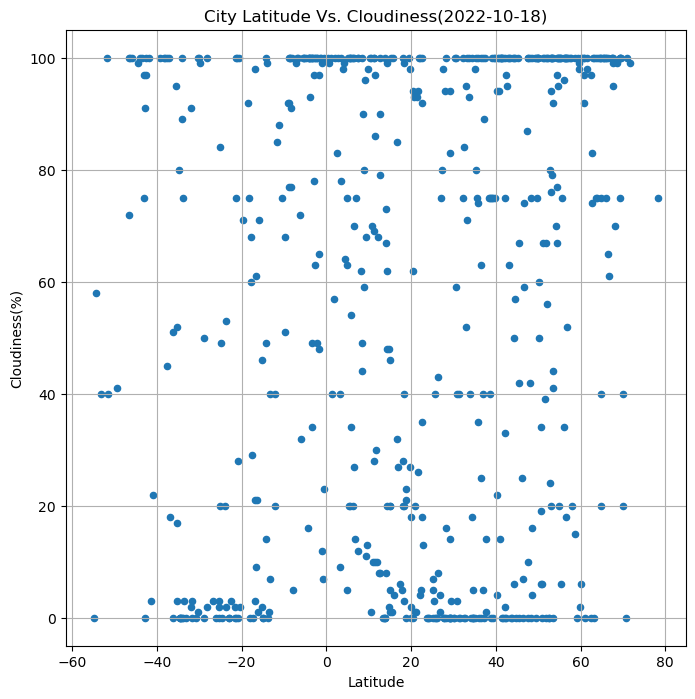

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="City Latitude Vs. Cloudiness(2022-10-18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
dot_size = 100
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

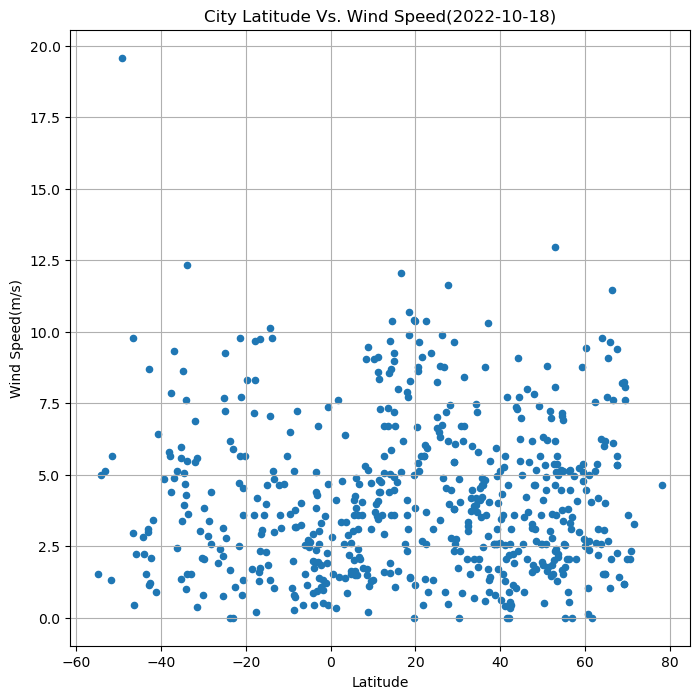

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="City Latitude Vs. Wind Speed(2022-10-18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
dot_size = 100
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,275.06,69,75,4.63,SJ,1714466370
4,nizhnesortymskiy,62.4397,71.7603,271.15,75,97,7.54,RU,1714466371
7,miramar beach,30.3744,-86.3586,296.19,94,100,0.00,US,1714466152
9,georgetown,5.4112,100.3354,307.12,62,20,4.12,MY,1714466225
10,ormara,25.2088,64.6357,305.13,30,5,6.65,PK,1714466371


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coquimbo,-29.9533,-71.3436,287.00,54,100,2.06,CL,1714465854
1,loja,-3.9931,-79.2042,287.48,97,100,1.74,EC,1714466370
3,edinburgh of the seven seas,-37.0676,-12.3116,285.87,64,100,9.31,SH,1714466370
5,adamstown,-25.0660,-130.1015,296.20,82,84,7.68,PN,1714466371
6,papatowai,-46.5619,169.4708,283.57,96,100,2.95,NZ,1714466371


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8390858537870303


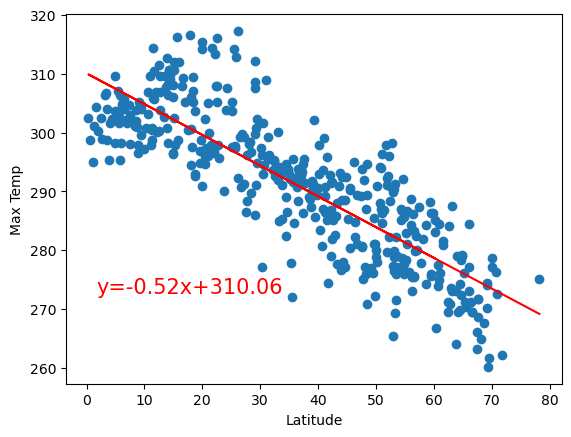

In [20]:
# Linear regression on Northern Hemisphere
correlation_coefficient = northern_hemi_df["Lat"].corr(northern_hemi_df["Max Temp"])
print("The r-value is:" , correlation_coefficient )

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate("y=%.2fx+%.2f"%(slope,intercept),xy =(0.15,0.3),xycoords="figure fraction", 
             color="red", size=15)
plt.show()

The r-value is: 0.7769192396440079


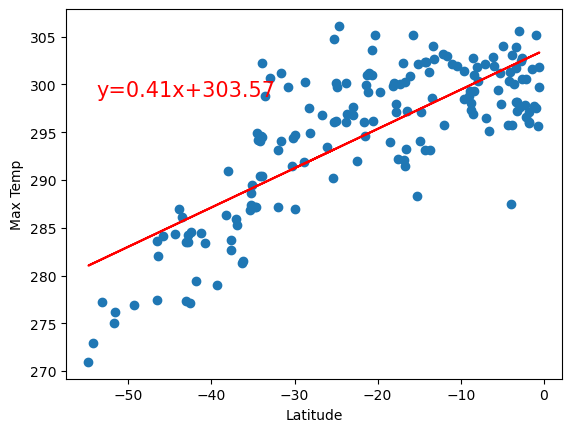

In [21]:
# Linear regression on Southern Hemisphere
correlation_coefficient = southern_hemi_df["Lat"].corr(southern_hemi_df["Max Temp"])
print("The r-value is:" , correlation_coefficient )

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate("y=%.2fx+%.2f"%(slope,intercept),xy =(0.15,0.7),xycoords="figure fraction", 
             color="red", size=15)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18319882430284692


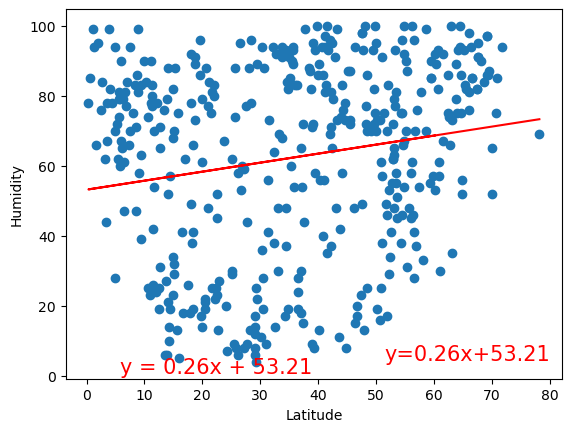

In [22]:
# Northern Hemisphere
correlation_coefficient = northern_hemi_df["Lat"].corr(northern_hemi_df["Humidity"])
print("The r-value is:" , correlation_coefficient )

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate("y=%.2fx+%.2f"%(slope,intercept),xy =(0.6,0.15),xycoords="figure fraction", 
             color="red", size=15)
plt.show()

The r-value is: 0.09164177020728641


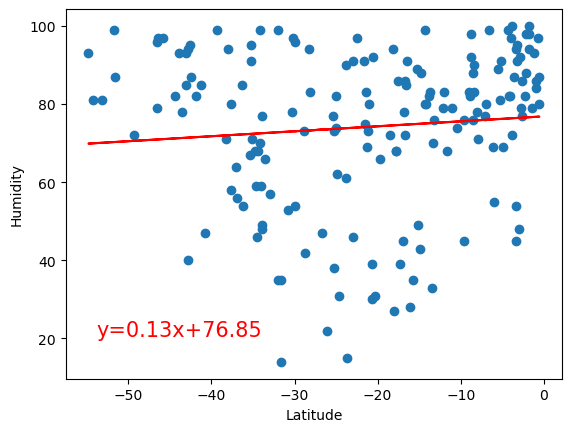

In [30]:
# Southern Hemisphere
correlation_coefficient = southern_hemi_df["Lat"].corr(southern_hemi_df["Humidity"])
print("The r-value is:" , correlation_coefficient )

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate("y=%.2fx+%.2f"%(slope,intercept),xy =(0.15,0.2),xycoords="figure fraction", 
             color="red", size=15)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2000615152916538


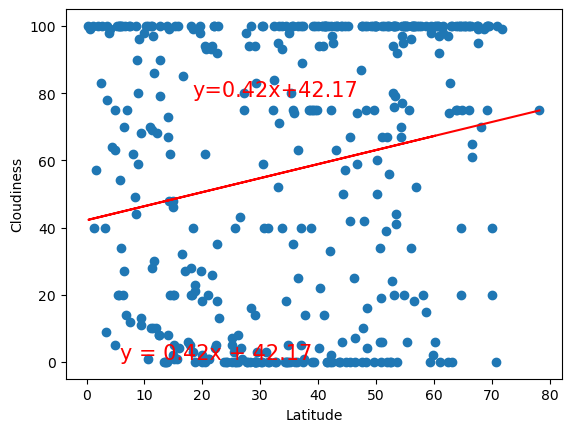

In [24]:
# Northern Hemisphere
correlation_coefficient = northern_hemi_df["Lat"].corr(northern_hemi_df["Cloudiness"])
print("The r-value is:" , correlation_coefficient )

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate("y=%.2fx+%.2f"%(slope,intercept),xy =(0.3,0.7),xycoords="figure fraction", 
             color="red", size=15)
plt.show()

The r-value is: 0.16644196354923646


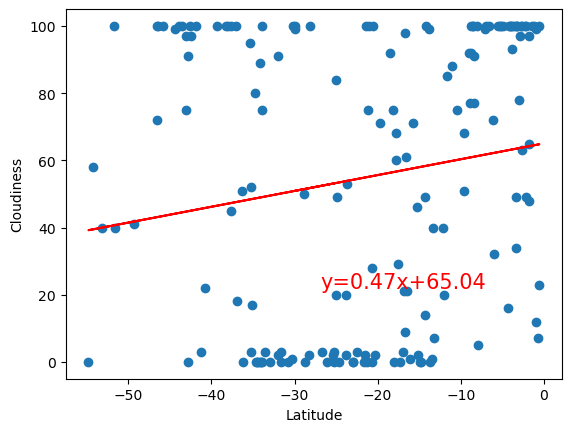

In [25]:
# Southern Hemisphere
correlation_coefficient = southern_hemi_df["Lat"].corr(southern_hemi_df["Cloudiness"])
print("The r-value is:" , correlation_coefficient )

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate("y=%.2fx+%.2f"%(slope,intercept),xy =(0.5,0.3),xycoords="figure fraction", 
             color="red", size=15)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04967710679098169


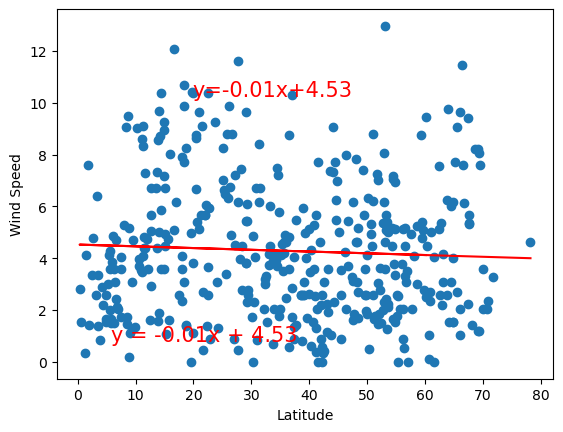

In [26]:
# Northern Hemisphere
correlation_coefficient = northern_hemi_df["Lat"].corr(northern_hemi_df["Wind Speed"])
print("The r-value is:" , correlation_coefficient )

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate("y=%.2fx+%.2f"%(slope,intercept),xy =(0.3,0.7),xycoords="figure fraction", 
             color="red", size=15)
plt.show()

The r-value is: -0.21933803013320818


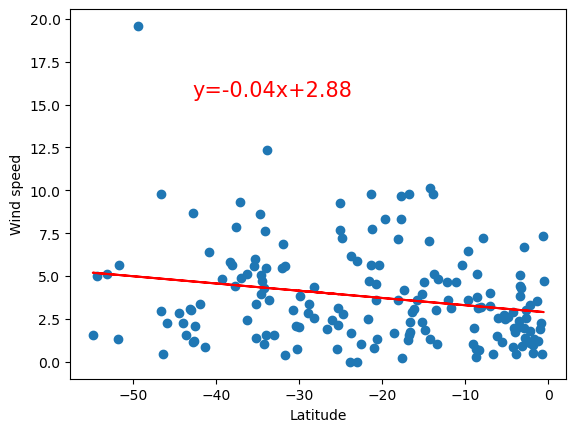

In [27]:
# Southern Hemisphere
correlation_coefficient = southern_hemi_df["Lat"].corr(southern_hemi_df["Wind Speed"])
print("The r-value is:" , correlation_coefficient )

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.annotate("y=%.2fx+%.2f"%(slope,intercept),xy =(0.3,0.7),xycoords="figure fraction", 
             color="red", size=15)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Northern Hemisphere
## Latitude and Max Temperature inversely Correlated. with a correlation coefficient 
# of (-0.52) we can say that they are medium correlated.
## there is a weak correlation between Latitude and Humidity with a coeeficirnt of correlation of 0.26
## There is a medium correlation between latitude and cloudiness with a coeeficirnt of correlation of 0.42
## ther is no correlation betweenbetween Latitude and wind speed with a coeeficirnt of correlation of



#Southern Hemisphere
## there is midium correlation between latitude and max temperature(0.41).
## there is a verry weak correlation between latitude and humidity(0.13).
## there is a medium correlation between latitude and cloudiness (0.47)
## there is a very weak correlation between latitude and wind speed(-0.04)